# Taller 5

- Daniela Martínez Quiroga
- María Isabella Rodríguez Arévalo

# Ejercicio 1 - Predicción cáncer

## Importar librerías

In [1]:
!pip install -U gradio
!pip install lightgbm xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
tor

In [9]:
import pandas as pd
import sklearn
import gradio as gr

from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
import lightgbm as lgb
import xgboost as xgb

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
import numpy as np


## DataSet y limpieza

In [ ]:
df = pd.read_csv('cancer.csv')
print(df.head())

x = df.drop('Diagnosis',axis=1)
x.fillna(x.mean(), inplace=True)
y = df['Diagnosis']

   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0      0.3001          0.14710     0.2419             0.07871  ...     17.33   
1      0.0869          0.07017     0.1812             0.05667  ...     23.41   
2      0.1974          0.12790     0.2069             0.05999  ...     25.53   
3      0.2414          0.10520     0.2597             0.09744  ...     26.50   
4      0.1980          0.10430     0.1809             0.05883  ...     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.

## Datos prueba y entrenamiento

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y)

## Entrenar el modelo

In [ ]:
#Models for Voting clasifier
mod3_op1 = LogisticRegression(penalty='elasticnet', solver='saga',max_iter=1000, l1_ratio=0.5)
mod3_op2 = SVC(kernel='linear')
mod3_op3 = SVC(kernel='poly', degree=2, gamma='scale')
mod3_op4 = SVC(kernel='rbf', gamma='scale')
mod3_op5 = DecisionTreeClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=10, min_impurity_decrease=0.0000001, min_samples_leaf=2)

mod3_op1.fit(x_train, y_train)
mod3_op2.fit(x_train, y_train)
mod3_op3.fit(x_train, y_train)
mod3_op4.fit(x_train, y_train)
mod3_op5.fit(x_train, y_train)

#Models for Stacking classifier
mod4_op1 =DecisionTreeClassifier(criterion='gini', max_depth=10, max_leaf_nodes=10, min_impurity_decrease=0.0000001, min_samples_leaf=2)
mod4_op2 = SVC(kernel='linear')
mod4_op3 = SVC(kernel='poly', degree=2, gamma='auto')
mod4_op4 = SVC(kernel='rbf', gamma='auto')

mod4_op1.fit(x_train, y_train)
mod4_op2.fit(x_train, y_train)
mod4_op3.fit(x_train, y_train)
mod4_op4.fit(x_train, y_train)

#Ensamble models
ens_op1 = RandomForestClassifier(n_estimators=100, criterion='entropy')
ens_op2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
ens_op3 = VotingClassifier([('lr', mod3_op1), ('svc_lin', mod3_op2), ('svc_poly', mod3_op3), ('svc_rbf', mod3_op4), ('dt', mod3_op5)], voting='hard')
ens_op4 = StackingClassifier(estimators=[('dt', mod4_op1), ('svc_lin', mod4_op2), ('svc_poly', mod4_op3), ('svc_rbf', mod4_op4)], final_estimator=LogisticRegression())

ens_op1.fit(x_train, y_train)
ens_op2.fit(x_train, y_train)
ens_op3.fit(x_train, y_train)
ens_op4.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(max_depth=10,
                                                       max_leaf_nodes=10,
                                                       min_impurity_decrease=1e-07,
                                                       min_samples_leaf=2)),
                               ('svc_lin', SVC(kernel='linear')),
                               ('svc_poly',
                                SVC(degree=2, gamma='auto', kernel='poly')),
                               ('svc_rbf', SVC(gamma='auto'))],
                   final_estimator=LogisticRegression())

## Tabla comparativa

La tabla indica que el modelo con mejor Accuracy y F1 Score en datos de entrenamiento es Gradient Boosting Classifier. Por otro lado, el modelo con mejor resultado en las métricas en datos de prueba es Stacking Classifier.

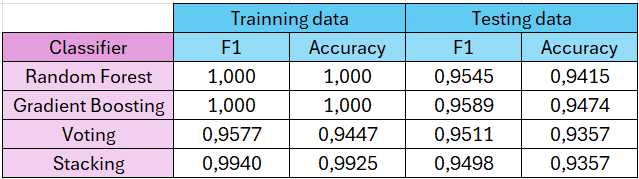

In [ ]:
models = [ens_op1, ens_op2, ens_op3, ens_op4]
model_names = ["RandomForestClassifier", "GradientBoostingClassifier", "VotingClassifier", "StackingClassifier"]

for model, model_name in zip(models, model_names):
    # Predictions for training and test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Calculate accuracy for training and test data
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    # Calculate F1 score for training and test data
    f1_train = f1_score(y_train, y_pred_train, pos_label='B')
    f1_test = f1_score(y_test, y_pred_test, pos_label='B')

    # Print the results
    print(f"{model_name}:")
    print(f"  Training Accuracy = {acc_train:.4f}, Training F1 Score = {f1_train:.4f}")
    print(f"  Test Accuracy = {acc_test:.4f}, Test F1 Score = {f1_test:.4f}")
    print("-" * 30)  # Separator for better readability

RandomForestClassifier:
  Training Accuracy = 1.0000, Training F1 Score = 1.0000
  Test Accuracy = 0.9415, Test F1 Score = 0.9545
------------------------------
GradientBoostingClassifier:
  Training Accuracy = 1.0000, Training F1 Score = 1.0000
  Test Accuracy = 0.9474, Test F1 Score = 0.9589
------------------------------
VotingClassifier:
  Training Accuracy = 0.9447, Training F1 Score = 0.9577
  Test Accuracy = 0.9357, Test F1 Score = 0.9511
------------------------------
StackingClassifier:
  Training Accuracy = 0.9925, Training F1 Score = 0.9940
  Test Accuracy = 0.9357, Test F1 Score = 0.9498
------------------------------


# Ejercicio 2 - Finca Raíz

## Carga y limpieza

In [3]:
# Cargar datos desde GitHub
url = "https://raw.githubusercontent.com/oscar-bustos/javeriana-analitica/main/housing/train.csv"
df = pd.read_csv(url)

# Separar características y variable objetivo
x = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Identificar columnas categóricas y numéricas
categorical_cols = x.select_dtypes(include=['object']).columns
numerical_cols = x.select_dtypes(include=['number']).columns

# Rellenar valores nulos
x[numerical_cols] = x[numerical_cols].fillna(x[numerical_cols].mean())  # Para numéricas
x[categorical_cols] = x[categorical_cols].fillna(x[categorical_cols].mode().iloc[0])  # Para categóricas

# Convertir variables categóricas a variables numéricas (One-Hot Encoding)
x = pd.get_dummies(x, columns=categorical_cols, drop_first=True)  # Evita colinealidad

# Verificar que no haya valores categóricos después de la transformación
print("Tipos de datos después de get_dummies:\n", x.dtypes.value_counts())

# Dividir en entrenamiento (70%) y prueba (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(f'Tamaño de x_train: {x_train.shape}')
print(f'Tamaño de x_test: {x_test.shape}')
print(f'Tamaño de y_train: {y_train.shape}')
print(f'Tamaño de y_test: {y_test.shape}')

Tipos de datos después de get_dummies:
 bool       208
int64       34
float64      3
Name: count, dtype: int64
Tamaño de x_train: (1022, 245)
Tamaño de x_test: (438, 245)
Tamaño de y_train: (1022,)
Tamaño de y_test: (438,)


## Ensamble

In [10]:
# Definir modelos
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "LightGBM": lgb.LGBMRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

# Evaluar modelos
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    results[name] = {
        "MSE_train": mean_squared_error(y_train, y_pred_train),
        "MSE_test": mean_squared_error(y_test, y_pred_test),
        "MAE_train": mean_absolute_error(y_train, y_pred_train),
        "MAE_test": mean_absolute_error(y_test, y_pred_test),
        "R2_train": r2_score(y_train, y_pred_train),
        "R2_test": r2_score(y_test, y_pred_test)
    }

# Definir el modelo de ensamble con StackingClassifier
estimators = [(name, model) for name, model in models.items()]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier(random_state=42))
stacking_model.fit(x_train, y_train)

# Evaluar el modelo de ensamble
y_pred_train_stack = stacking_model.predict(x_train)
y_pred_test_stack = stacking_model.predict(x_test)

results["Stacking"] = {
    "MSE_train": mean_squared_error(y_train, y_pred_train_stack),
    "MSE_test": mean_squared_error(y_test, y_pred_test_stack),
    "MAE_train": mean_absolute_error(y_train, y_pred_train_stack),
    "MAE_test": mean_absolute_error(y_test, y_pred_test_stack),
    "R2_train": r2_score(y_train, y_pred_train_stack),
    "R2_test": r2_score(y_test, y_pred_test_stack)
}



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3273
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 149
[LightGBM] [Info] Start training from score 181312.692759
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3273
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 149
[LightGBM] [Info] Start training from score 236.264188


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3074
[LightGBM] [Info] Number of data points in the train set: 817, number of used features: 143
[LightGBM] [Info] Start training from score 236.059976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mejor modelo: GradientBoosting
Métricas del mejor modelo:
MSE (Train): 190017577.2374837
MSE (Test): 675612306.5571096
MAE (Train): 10136.20662346394
MAE (Test): 16655.81268382544
R2 (Train): 0.9684281474494126
R2 (Test): 0.9031809646441084


NameError: name 'RandomizedSearchCV' is not defined

In [11]:
# Mostrar resultados
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print()


RandomForest:
  MSE_train: 147030084.3955
  MSE_test: 755221910.3058
  MAE_train: 6840.5819
  MAE_test: 17110.1800
  R2_train: 0.9756
  R2_test: 0.8918

GradientBoosting:
  MSE_train: 190017577.2375
  MSE_test: 675612306.5571
  MAE_train: 10136.2066
  MAE_test: 16655.8127
  R2_train: 0.9684
  R2_test: 0.9032

LightGBM:
  MSE_train: 143719387.2224
  MSE_test: 689745760.0267
  MAE_train: 5090.8150
  MAE_test: 16283.7082
  R2_train: 0.9761
  R2_test: 0.9012

XGBoost:
  MSE_train: 621405.1875
  MSE_test: 814552320.0000
  MAE_train: 551.8666
  MAE_test: 18009.0801
  R2_train: 0.9999
  R2_test: 0.8833

Stacking:
  MSE_train: 1970374074.3072
  MSE_test: 1714319069.4635
  MAE_train: 21676.5108
  MAE_test: 25912.5228
  R2_train: 0.6726
  R2_test: 0.7543



## Interfaz con Gradio

In [ ]:
import gradio as gr

# Función para leer el archivo y extraer los campos y opciones
def parse_file(filepath):
    fields = {}
    with open(filepath, "r", encoding="utf-8") as file:
        lines = file.readlines()

    current_field = None
    for line in lines:
        line = line.strip()
        if not line:
            continue

        if ":" in line:
            field_name = line.split(":")[0].strip()
            fields[field_name] = []
            current_field = field_name
        elif current_field and "\t" in line:
            option = line.split("\t")[0].strip()
            fields[current_field].append(option)

    return fields

def predict_price(**kwargs):
    rf_model = models["RandomForest"]
    input_data = pd.DataFrame([kwargs])
    prediction = rf_model.predict(input_data)[0]
    return "Datos ingresados:\n" + "\n".join([f"{key}: {value}" for key, value in kwargs.items()]) + f"\n\nPrediction: {prediction}"

# Leer los datos del archivo
data_file = "/content/data_description.txt"
fields = parse_file(data_file)

# Crear los componentes dinámicamente
inputs = []
for field, options in fields.items():
    if options:
        inputs.append(gr.Dropdown(choices=options, label=field))
    else:
        inputs.append(gr.Textbox(label=field))

iface = gr.Interface(fn=predict_price, inputs=inputs, outputs="text")
iface.launch()


/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1024: UserWarning: Expected 0 arguments for function <function predict_price at 0x7c7e317f8ea0>, received 83.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1032: UserWarning: Expected maximum 0 arguments for function <function predict_price at 0x7c7e317f8ea0>, received 83.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9401fdb5fd64bbc86a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
